### THE BEST CLASSIFIER

#### STUDY OF A DATASET USING PANDAS LIBRARY, AND APPLY THE FOLLOWING ALGORITMS, AND FIND THE RIGHT FOR ACCURACY MEASURE METHODS

In [14]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [15]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-06-11 09:23:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-06-11 09:23:28 (103 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [5]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
df.shape

(346, 10)

#### VISUALIZATION AND CONVERSION

In [7]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


#### VISUALIZATION AND PREPAIRING

In [8]:
df['loan_status'].value_counts(normalize=True)

PAIDOFF       0.751445
COLLECTION    0.248555
Name: loan_status, dtype: float64

##### 260 OF THE PEOPLE HAVE PAID ON TIME // 86 HAVE GONE INTO COLLECTION STATUS

In [8]:
!conda install -c anaconda seaborn -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |             main           3 KB  anaconda
    _py-xgboost-mutex-2.0      |            cpu_0           9 KB  anaconda
    _pytorch_select-0.1        |            cpu_0           2 KB  anaconda
    absl-py-0.10.0             |           py37_0         169 KB  anaconda
    aiohttp-3.6.3              |   py37h7b6447c_0         626 KB  anaconda
    argon2-cffi-20.1.0         |   py37h7b6447c_1         

<AxesSubplot:>

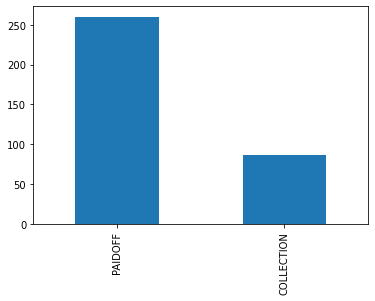

In [9]:
df['loan_status'].value_counts().plot(kind='bar')

In [21]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

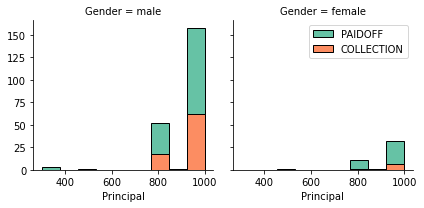

In [11]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

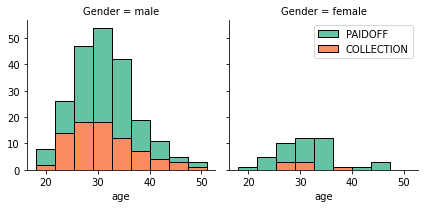

In [12]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### EXTRACTION

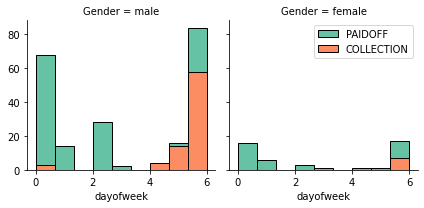

In [13]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [14]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


#### CONVERSION

In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [16]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## ENCODING

In [17]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [18]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [19]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [20]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [21]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## SKLEARN TO MODEL AND STADARD DATA

In [22]:
# TRAINING
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
X_train_2 = X_train.copy()
X_test_2 = X_test.copy()

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_test[:5])

[[ 0.56081126  0.9437816  -0.14485029 -0.40565621  0.85146932 -0.40565621
   1.10716144 -0.82639387]
 [-1.23900162 -0.9677917  -0.14485029 -0.40565621  0.85146932 -0.40565621
  -0.90321065  1.21007674]
 [ 0.56081126 -0.9677917   0.02383612 -0.40565621 -1.17444044 -0.40565621
   1.10716144 -0.82639387]
 [ 0.56081126  0.9437816  -1.15696879 -0.40565621 -1.17444044 -0.40565621
  -0.90321065  1.21007674]
 [ 0.56081126  0.9437816   0.52989537 -0.40565621 -1.17444044 -0.40565621
  -0.90321065  1.21007674]]


# ALGORITHM

K Nearest Neighbor(KNN) //
Decision Tree //
Support Vector Machine //
Logistic Regression //

### K Nearest Neighbor(KNN) 

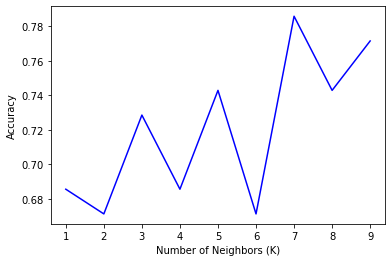

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
     
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
plt.plot(range(1,Ks),mean_acc,'b')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.show()

In [25]:
k = 7
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
yhat_neigh = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_neigh))

Train set Accuracy:  0.8115942028985508
Test set Accuracy:  0.7857142857142857


### DECISION TREES

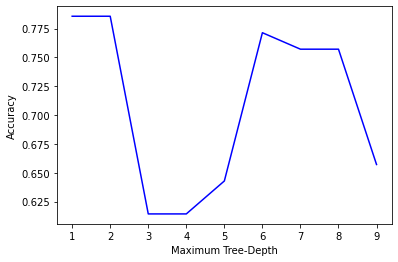

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
depth = 10
mean_acc = np.zeros((depth-1))

for n in range(1,depth):
     
    tree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train, y_train)
    yhat=tree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
plt.plot(range(1,depth),mean_acc,'b')
plt.ylabel('Accuracy')
plt.xlabel('Maximum Tree-Depth')
plt.show()

In [27]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=6).fit(X_train, y_train)
yhat_tree = tree.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, tree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_tree))

Train set Accuracy:  0.7753623188405797
Test set Accuracy:  0.7714285714285715


### VECTOR MACHINE

[0. 0. 0. 0.]


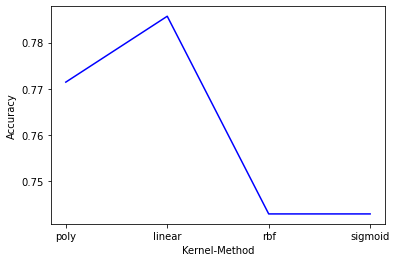

In [28]:
from sklearn import svm
from sklearn import metrics
kernel = ['poly', 'linear', 'rbf', 'sigmoid']
mean_acc = np.zeros((len(kernel)))
print(mean_acc)

for n in kernel:
    
    i = 0
    support = svm.SVC(kernel=n).fit(X_train, y_train)
    yhat=support.predict(X_test)
    mean_acc[kernel.index(n)] = metrics.accuracy_score(y_test, yhat)
    
plt.plot(kernel, mean_acc, 'b')
plt.ylabel('Accuracy')
plt.xlabel('Kernel-Method')
plt.show()

In [29]:
support = svm.SVC(kernel='linear').fit(X_train, y_train)
yhat_svm = support.predict(X_test)
print('Train set Accuracy:', metrics.accuracy_score(y_train, support.predict(X_train)))
print('Test set Accuracy:', metrics.accuracy_score(y_test, yhat_svm))

Train set Accuracy: 0.7427536231884058
Test set Accuracy: 0.7857142857142857


### LOGISTIC REGRESSION

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

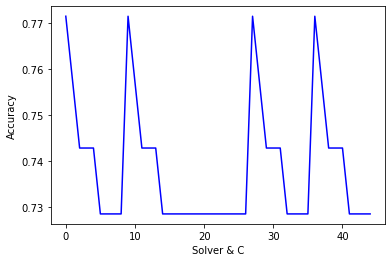

In [31]:
from itertools import product
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
Cs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
prod = list(product(solvers, Cs))
prod_num = {prod.index(prod_item): prod_item for prod_item in prod}
mean_acc = np.zeros((len(prod)))

for n in prod:
    
    lr = LogisticRegression(C=n[1], solver=n[0]).fit(X_train, y_train)
    yhat=lr.predict(X_test)
    mean_acc[prod.index(n)] = metrics.accuracy_score(y_test, yhat)

plt.plot(list(prod_num.keys()), mean_acc, 'b')
plt.ylabel('Accuracy')
plt.xlabel('Solver & C')
plt.show()

In [32]:
print('Best Parameter-Combination:', prod_num[mean_acc.argmax()])
lr = LogisticRegression(C=0.1, solver='newton-cg').fit(X_train_2, y_train)
yhat_lr = lr.predict(X_test_2)
print('Train set Accuracy:', metrics.accuracy_score(y_train, lr.predict(X_train_2)))
print('Test set Accuracy:', metrics.accuracy_score(y_test, yhat_lr))

Best Parameter-Combination: ('newton-cg', 0.1)
Train set Accuracy: 0.7391304347826086
Test set Accuracy: 0.7857142857142857


# EVALUATION

In [33]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [34]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-06-11 09:56:35--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-06-11 09:56:35 (45.4 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [35]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [36]:
test_df.shape

(54, 10)

In [37]:
test_df['weekday'] = pd.to_datetime(test_df['effective_date']).dt.dayofweek
test_df['weekend'] = test_df['weekday'].apply(lambda x: 1 if (x>3)  else 0)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature, pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_Feature['Gender'].replace(to_replace=['female', 'male'], value=[1, 0], inplace=True)
test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [38]:
X_test = test_Feature
y_test = test_df['loan_status'].values
X_test = scaler.transform(X_test)

In [39]:
print('Jaccard-Score:', metrics.jaccard_score(y_test, neigh.predict(X_test), pos_label='PAIDOFF'))
print('F1-Score:', metrics.f1_score(y_test, neigh.predict(X_test), pos_label='PAIDOFF'))

Jaccard-Score: 0.6981132075471698
F1-Score: 0.8222222222222222


In [40]:
print('Jaccard-Score:', metrics.jaccard_score(y_test, tree.predict(X_test), pos_label='PAIDOFF'))
print('F1-Score:', metrics.f1_score(y_test, tree.predict(X_test), pos_label='PAIDOFF'))

Jaccard-Score: 0.7115384615384616
F1-Score: 0.8314606741573034


In [41]:
print('Jaccard-Score:', metrics.jaccard_score(y_test, lr.predict(X_test), pos_label='PAIDOFF'))
print('F1-Score:', metrics.f1_score(y_test, lr.predict(X_test), pos_label='PAIDOFF'))
print('Log-Loss:', metrics.log_loss(y_test, lr.predict_proba(X_test)))

Jaccard-Score: 0.5957446808510638
F1-Score: 0.7466666666666666
Log-Loss: 0.499440878523738
